<a href="https://colab.research.google.com/github/ankit-rathi/Quantvesting_v2/blob/main/myStocks_Portfolio_Analysis_v2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip install pyxirr

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 546.8/546.8 kB 7.3 MB/s eta 0:00:00


In [2]:
import pandas as pd
import numpy as np
from google.colab import drive
drive.mount('/content/drive')
import os
project_path = '/content/drive/My Drive/quantvesting'
os.chdir(project_path)

import warnings
warnings.filterwarnings('ignore')

from google.colab import data_table

Mounted at /content/drive


Run date time (IST): 2025-01-20 21:42:30
-------------------
qualified stocks: 81
with latest results: 76
still star stocks: 40
-------------------
Initial Investment:  1.04 C
CY Investment:  1.17 C
Reserve:  10.39 L
Current:  1.17 C
-------------------
Today PnL: 53.09 K (0.46%)
Current PnL: -14.19 L (-12.09%)
CY Booked + Current PnL: -94.36 K (-0.8%)
-------------------
Total profit:  2.33 L
Total loss:  -16.52 L
-------------------
Total Booked + Current PnL: 12.17 L (11.67%)
Total Booked PnL: 26.36 L (25.28%)
Curr Year Booked PnL: 13.25 L (11.37%)
Prev Year Booked PnL: 13.11 L (12.57%)
Est FTT:  1.83 C
Est FTT PnL: 66.40 L (56.96%)
-------------------
Est LTT:  2.42 C
Est LTT PnL: 1.25 C (107.63%)
Deployed:  1.04 C
Current:  1.17 C
CAGR/XIRR %: 9.4%


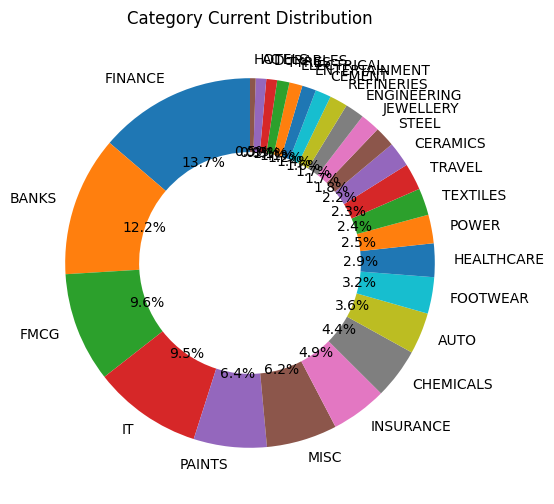

In [3]:
# Import the function from the script
import myStocks_Portfolio_Analysis_v2

eod = 0

# Call the function to get the DataFrame
df_portfolio_features = myStocks_Portfolio_Analysis_v2.get_portfolio_features_v2(eod)
cols = ['Symbol', 'AvgCost', 'FTT', 'Dev%_PE', 'Conviction', 'RSP', 'Current', 'Current P/L', 'FTT Amt', 'Today P/L%', 'Current P/L%', 'FTT%', 'OTT%', 'XIRR', 'RRR Ind', 'CurrAlloc%', 'Gained%', 'Criteria', 'Strategy', 'CapType', 'Category']
df_portfolio_features = df_portfolio_features[cols]

In [4]:
# all portfolio
df_portfolio_features = df_portfolio_features.sort_values(by = 'FTT Amt', ascending=True)
data_table.DataTable(df_portfolio_features, include_index=False)

,Symbol,AvgCost,FTT,Dev%_PE,Conviction,RSP,Current,Current P/L,FTT Amt,Today P/L%,...,FTT%,OTT%,XIRR,RRR Ind,CurrAlloc%,Gained%,Criteria,Strategy,CapType,Category
55,RELIANCE,1284.26,1526.00,-1.59,X-LC,93.83,167098.0,2713.0,28223.0,0.24,...,16.89,18.82,70.0,0.10,1.57,8.31,XY25,NTT,LC,REFINERIES
65,SIS,477.00,528.00,57.46,M-SC,16.05,56797.0,-24293.0,32965.0,-0.46,...,58.04,10.69,-27.0,-0.74,0.53,0.95,X40N,NTT,SC,MISC
48,NESTLEIND,2226.45,2755.00,-19.29,X-LC,81.48,141696.0,-797.0,34631.0,-0.14,...,24.44,23.74,NaN,-0.02,1.33,2.98,XY25,NTT,LC,FMCG
18,CERA,9059.90,10420.45,-11.22,X-SC,32.10,68720.0,-21879.0,35487.0,-0.52,...,51.64,15.02,-54.0,-0.62,0.65,4.33,X40N,ATH,SC,CERAMICS
72,TCS,4164.02,4998.00,0.42,X-LC,58.02,159034.0,-3363.0,35894.0,-1.13,...,22.57,20.03,15.0,-0.09,1.50,11.88,X40,BTT,LC,IT
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
56,REPCOHOME,527.76,880.00,-11.34,H-SC,61.73,152471.0,-42272.0,172246.0,0.95,...,112.97,66.74,-38.0,-0.25,1.44,10.69,XY24,NTT,SC,FINANCE
58,SAIL,130.64,228.00,48.27,M-MC,38.27,189196.0,-35766.0,203424.0,0.96,...,107.52,74.53,-22.0,-0.18,1.78,9.77,XY24,BTT,MC,STEEL
53,RBLBANK,230.61,388.00,-41.68,M-SC,83.95,160711.0,-73589.0,233497.0,1.97,...,145.29,68.25,-50.0,-0.32,1.51,5.83,XY24,NTT,SC,BANKS
11,BANDHANBNK,217.54,400.00,-45.61,H-SC,46.91,167227.0,-71414.0,271577.0,0.79,...,162.40,83.87,-30.0,-0.26,1.57,10.73,XY24,NTT,SC,BANKS


In [5]:
# Xceptional allocation
tmp_df = df_portfolio_features[df_portfolio_features['Conviction'].str.startswith('X-', na=False)]
data_table.DataTable(tmp_df, include_index=False)

,Symbol,AvgCost,FTT,Dev%_PE,Conviction,RSP,Current,Current P/L,FTT Amt,Today P/L%,...,FTT%,OTT%,XIRR,RRR Ind,CurrAlloc%,Gained%,Criteria,Strategy,CapType,Category
55,RELIANCE,1284.26,1526.00,-1.59,X-LC,93.83,167098.0,2713.0,28223.0,0.24,...,16.89,18.82,70.0,0.10,1.57,8.31,XY25,NTT,LC,REFINERIES
48,NESTLEIND,2226.45,2755.00,-19.29,X-LC,81.48,141696.0,-797.0,34631.0,-0.14,...,24.44,23.74,NaN,-0.02,1.33,2.98,XY25,NTT,LC,FMCG
18,CERA,9059.90,10420.45,-11.22,X-SC,32.10,68720.0,-21879.0,35487.0,-0.52,...,51.64,15.02,-54.0,-0.62,0.65,4.33,X40N,ATH,SC,CERAMICS
72,TCS,4164.02,4998.00,0.42,X-LC,58.02,159034.0,-3363.0,35894.0,-1.13,...,22.57,20.03,15.0,-0.09,1.50,11.88,X40,BTT,LC,IT
47,MRF,112863.40,150508.27,-10.05,X-MC,6.79,113787.0,924.0,36719.0,-0.14,...,32.27,33.35,NaN,0.03,1.07,0.69,AR,ATH,MC,TYRES
70,TATAELXSI,7332.28,9000.00,-20.52,X-MC,9.88,86797.0,-15855.0,39206.0,-0.20,...,45.17,22.74,-14.0,-0.40,0.82,4.35,X40N,NTT,MC,IT
43,LTIM,5664.39,7262.39,10.65,X-LC,71.60,174759.0,4827.0,43113.0,-1.10,...,24.67,28.21,1.0,0.11,1.65,28.38,X200,ATH,LC,IT
50,PIDILITIND,2482.94,3576.00,-18.11,X-LC,28.40,161690.0,17679.0,45726.0,-0.91,...,28.28,44.02,9.0,0.39,1.52,11.61,X40,BTT,LC,CHEMICALS
36,INFY,1436.24,2275.00,1.20,X-LC,34.57,188583.0,39214.0,48013.0,-0.12,...,25.46,58.40,37.0,0.82,1.78,31.80,X40,BTT,LC,IT
75,TTKPRESTIG,769.29,1149.24,12.00,X-SC,19.75,100143.0,-634.0,50412.0,0.43,...,50.34,49.39,0.0,-0.01,0.94,15.03,X40N,ATH,SC,DURABLES


In [6]:
# XSP allocation
tmp_df = df_portfolio_features[(df_portfolio_features['Criteria'].isin(['XY24','XY25']) ) ]
data_table.DataTable(tmp_df, include_index=False)

,Symbol,AvgCost,FTT,Dev%_PE,Conviction,RSP,Current,Current P/L,FTT Amt,Today P/L%,...,FTT%,OTT%,XIRR,RRR Ind,CurrAlloc%,Gained%,Criteria,Strategy,CapType,Category
55,RELIANCE,1284.26,1526.0,-1.59,X-LC,93.83,167098.0,2713.0,28223.0,0.24,...,16.89,18.82,70.0,0.10,1.57,8.31,XY25,NTT,LC,REFINERIES
48,NESTLEIND,2226.45,2755.0,-19.29,X-LC,81.48,141696.0,-797.0,34631.0,-0.14,...,24.44,23.74,NaN,-0.02,1.33,2.98,XY25,NTT,LC,FMCG
21,DABUR,518.36,735.0,-7.21,X-MC,85.19,133008.0,826.0,54414.0,-0.85,...,40.91,41.79,-1.0,0.02,1.25,6.33,XY24,BTT,MC,FMCG
39,JIOFIN,320.24,387.0,-17.26,M-LC,13.58,136196.0,-22003.0,54982.0,-1.18,...,40.37,20.85,44.0,-0.40,1.28,14.99,XY24,BTT,LC,FINANCE
26,GICRE,335.06,583.0,14.62,H-MC,12.35,197327.0,50906.0,57442.0,3.16,...,29.11,74.00,110.0,0.89,1.86,45.95,XY24,BTT,MC,INSURANCE
77,UNIONBANK,123.87,163.0,-17.66,M-MC,43.21,126923.0,-13917.0,58410.0,2.70,...,46.02,31.59,-43.0,-0.24,1.20,10.25,XY24,NTT,MC,BANKS
71,TATAMOTORS,798.82,1065.0,-55.76,M-LC,92.59,158742.0,-5016.0,59576.0,-0.69,...,37.53,33.32,-34.0,-0.08,1.49,7.22,XY24,NTT,LC,AUTO
49,NHPC,82.08,115.0,185.56,M-MC,60.49,137371.0,-3642.0,60196.0,-0.55,...,43.82,40.11,-61.0,-0.06,1.29,10.18,XY24,NTT,MC,POWER
14,BERGEPAINT,558.54,680.0,-34.88,H-MC,90.12,148514.0,-28543.0,67039.0,-0.06,...,45.14,21.75,-16.0,-0.43,1.40,6.24,XY24,NTT,MC,PAINTS
64,SHALBY,261.39,327.0,58.41,M-SC,80.25,159542.0,-21601.0,67071.0,0.02,...,42.04,25.10,-30.0,-0.32,1.50,9.32,XY24,NTT,SC,HEALTHCARE


In [7]:
# XR/AR/SR allocation
tmp_df = df_portfolio_features[df_portfolio_features['Criteria'].isin(['AR','XR','SR'])]
data_table.DataTable(tmp_df, include_index=False)

,Symbol,AvgCost,FTT,Dev%_PE,Conviction,RSP,Current,Current P/L,FTT Amt,Today P/L%,...,FTT%,OTT%,XIRR,RRR Ind,CurrAlloc%,Gained%,Criteria,Strategy,CapType,Category
47,MRF,112863.40,150508.27,-10.05,X-MC,6.79,113787.0,924.0,36719.0,-0.14,...,32.27,33.35,NaN,0.03,1.07,0.69,AR,ATH,MC,TYRES
74,TRIDENT,37.35,48.00,65.22,M-SC,35.80,79979.0,-12276.0,38582.0,0.84,...,48.24,28.51,-15.0,-0.32,0.75,8.88,XR,NTT,SC,TEXTILES
42,LAOPALA,369.40,464.00,-19.15,M-SC,45.68,83238.0,-17608.0,43434.0,-0.51,...,52.18,25.61,-45.0,-0.41,0.78,3.73,AR,NTT,SC,CERAMICS
35,INDUSINDBK,1354.50,1800.00,-35.28,M-MC,88.89,55330.0,-21876.0,47268.0,-0.03,...,85.43,32.89,-20.0,-0.46,0.52,4.44,XR,NTT,MC,BANKS
45,MASFIN,326.60,401.09,-34.36,H-SC,23.46,72900.0,-25080.0,47429.0,-0.06,...,65.06,22.81,-75.0,-0.53,0.69,0.00,XR,ATH,SC,FINANCE
15,BRITANNIA,4858.30,6446.05,-0.22,X-LC,87.65,166104.0,922.0,53070.0,0.64,...,31.95,32.68,239.0,0.02,1.56,6.01,AR,ATH,LC,FMCG
22,DEN,52.79,75.00,-24.26,L-SC,59.26,66784.0,-17680.0,53213.0,3.32,...,79.68,42.07,-21.0,-0.33,0.63,9.01,AR,NTT,SC,ENTERTAINMENT
16,BSOFT,628.85,844.81,-7.43,M-SC,22.22,93292.0,-16757.0,54548.0,0.11,...,58.47,34.34,-34.0,-0.31,0.88,1.42,XR,ATH,SC,IT
29,HATHWAY,19.74,31.40,16.54,L-SC,44.44,63520.0,-15440.0,62078.0,5.24,...,97.73,59.07,-20.0,-0.25,0.60,9.22,XR,NTT,SC,ENTERTAINMENT
57,ROUTE,1558.40,2254.94,-39.63,M-SC,40.12,85790.0,-17064.0,63038.0,-0.13,...,73.48,44.70,-32.0,-0.27,0.81,1.16,SR,ATH,SC,IT


In [8]:
# Top N allocation
df_tmp = df_portfolio_features.sort_values(by = 'CurrAlloc%', ascending=False)
top_n_values = [10, 20, 30]

sum_df = pd.DataFrame({
    'Top_N': top_n_values,
    'Sum_Alloc%': [df_tmp['CurrAlloc%'].head(n).sum() for n in top_n_values]
})

sum_df

,Top_N,Sum_Alloc%
0,10,20.19
1,20,36.02
2,30,50.65


In [9]:
# criteria-wise allocation
df_portfolio_features.groupby('Criteria')['CurrAlloc%'].sum().sort_values(ascending=False)

,CurrAlloc%
Criteria,
XY24,44.29
X40,18.23
X40N,12.65
XR,10.08
AR,8.65
XY25,2.90
X200,1.65
SR,1.53


In [10]:
# conviction-wise allocation
df_portfolio_features.groupby('Conviction')['CurrAlloc%'].sum().sort_values(ascending=False)

,CurrAlloc%
Conviction,
M-SC,27.57
X-LC,22.07
H-SC,15.58
M-MC,10.29
X-MC,5.57
H-MC,4.95
X-SC,4.92
L-SC,2.93
M-LC,2.77


In [11]:
# criteria-conviction-wise allocation
df_portfolio_features.groupby(['Criteria', 'Conviction'])['CurrAlloc%'].sum().sort_values(ascending=False)

Criteria  Conviction
XY24      M-SC          14.42
X40       X-LC          14.36
XY24      H-SC           8.51
          M-MC           7.99
XR        M-SC           4.99
XY24      H-MC           4.95
X40N      M-SC           4.84
          H-SC           4.25
AR        X-LC           3.16
XY25      X-LC           2.90
XY24      M-LC           2.77
X40N      X-MC           1.97
X200      X-LC           1.65
X40N      X-SC           1.59
X40       H-LC           1.57
AR        M-SC           1.49
XR        H-SC           1.45
XY24      X-SC           1.43
AR        H-SC           1.37
XR        M-MC           1.37
X40       X-MC           1.28
XY24      X-MC           1.25
          L-SC           1.21
XR        X-SC           1.18
          L-SC           1.09
AR        X-MC           1.07
X40       M-SC           1.02
AR        M-MC           0.93
SR        M-SC           0.81
          X-SC           0.72
AR        L-SC           0.63
Name: CurrAlloc%, dtype: float64

In [12]:
# sector-wise stats
df_tmp = df_portfolio_features.groupby('Category')[['CurrAlloc%', 'Current', 'Current P/L', 'FTT Amt']].sum().sort_values(by=['Current', 'Current P/L'], ascending=False)
df_tmp['Current P/L%'] = round(df_tmp['Current P/L'] * 100 / df_tmp['Current'], 2)
df_tmp['FTT%'] = round(df_tmp['FTT Amt'] * 100 / df_tmp['Current'], 2)
cols = ['CurrAlloc%', 'Current P/L%', 'FTT%']
df_tmp[cols].sort_values(by=['CurrAlloc%'], ascending=False)

,CurrAlloc%,Current P/L%,FTT%
Category,,,
FINANCE,13.74,-12.00,59.16
BANKS,12.24,-19.34,80.10
FMCG,9.59,-5.54,43.78
IT,9.52,-10.21,65.60
PAINTS,6.39,-21.19,57.05
MISC,6.18,-15.25,51.80
INSURANCE,4.88,6.63,43.73
CHEMICALS,4.42,-15.07,90.90
AUTO,3.61,-7.21,54.35


In [13]:
# money to be made criteria-wise
df_portfolio_features.groupby('Criteria')['FTT Amt'].sum().sort_values(ascending=False)

,FTT Amt
Criteria,
XY24,2952861.0
XR,1019530.0
X40N,926490.0
X40,740277.0
AR,712401.0
SR,182855.0
XY25,62854.0
X200,43113.0


In [14]:
# money to be made conviction-wise
df_portfolio_features.groupby('Conviction')['FTT Amt'].sum().sort_values(ascending=False)

,FTT Amt
Conviction,
M-SC,2068476.0
H-SC,1544864.0
M-MC,843093.0
X-LC,779725.0
X-SC,379919.0
L-SC,286794.0
X-MC,239229.0
H-MC,198156.0
M-LC,114558.0


In [15]:
# money to be made criteria and conviction-wise
df_portfolio_features.groupby(['Criteria','Conviction'])['FTT Amt'].sum().sort_values(ascending=False)

Criteria  Conviction
XY24      M-SC          955926.0
          H-SC          728968.0
          M-MC          640444.0
X40       X-LC          550319.0
XR        M-SC          445595.0
X40N      M-SC          413692.0
          H-SC          333774.0
AR        H-SC          297696.0
XY24      H-MC          198156.0
XR        H-SC          184426.0
          L-SC          163225.0
          M-MC          125706.0
AR        M-SC          124391.0
          X-LC          123439.0
SR        X-SC          119817.0
XY24      M-LC          114558.0
XR        X-SC          100578.0
X40N      X-MC           93125.0
          X-SC           85899.0
AR        M-MC           76943.0
XY24      X-SC           73625.0
          L-SC           70356.0
X40       H-LC           69153.0
          M-SC           65834.0
SR        M-SC           63038.0
XY25      X-LC           62854.0
X40       X-MC           54971.0
XY24      X-MC           54414.0
AR        L-SC           53213.0
X200      X-LC           43113.0
AR        X-MC           36719.0
Name: FTT Amt, dtype: float64

In [16]:
# conviction-wise stock count
df_portfolio_features['Conviction'].value_counts()

,count
Conviction,
M-SC,26
X-LC,13
H-SC,12
M-MC,9
X-SC,5
X-MC,5
L-SC,4
H-MC,3
M-LC,2
